In [28]:
import os
import re
import emoji
import numpy as np
import unicodedata
import pandas as pd
from bs4 import BeautifulSoup
from sklearn.metrics import roc_auc_score
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


#pca
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale


# Tratamiento de datos
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns

# Preprocesado y modelado

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings

import warnings
warnings.filterwarnings('ignore')


#modelado TSE MDS
from sklearn.manifold import MDS, TSNE
from sklearn.preprocessing import StandardScaler

In [29]:
df=pd.read_csv("C:/Users/MX03932000/Documents/Personales/Mod_3/Fraud_Data_sep/Fraud_Data_sep.txt", sep="|")

In [30]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,...,enrichment_INDUS,enrichment_CHAS,enrichment_NOX,enrichment_RM,enrichment_DIS,enrichment_RAD,enrichment_TAX,enrichment_PTRATIO,enrichment_B,enrichment_LSTAT
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4550.0,0,...,2.31,0.0,0.538,6.575,4.09,1.0,296.0,15.3,396.9,4.98
1,1,'C1093826151','4',NaN,'28007','M855959430','28007','es_hyper',14380.0,0,...,2.31,0.0,0.538,6.575,4.09,1.0,NaN,15.3,NaN,4.98
2,2,'C1093826151','4','M','28007','M348934600','28007','es_transportation',37210.0,0,...,2.31,0.0,0.538,6.575,4.09,1.0,296.0,15.3,396.9,4.98
3,3,'C1093826151','4','M','28007','M348934600','28007','es_transportation',31630.0,0,...,2.31,0.0,NaN,6.575,4.09,NaN,296.0,15.3,NaN,4.98
4,4,'C1093826151','4','M','28007','M348934600','28007','es_transportation',35860.0,0,...,2.31,NaN,0.538,6.575,4.09,1.0,296.0,15.3,NaN,4.98


In [31]:
def dequote(s):
    """
    If a string has single or double quotes around it, remove them.
    Make sure the pair of quotes match.
    If a matching pair of quotes is not found, return the string unchanged.
    """
    if (s[0] == s[-1]) and s.startswith(("'", '"')):
        return s[1:-1]
    return s

In [32]:
df["customer"]=df["customer"].map(lambda x: dequote(x))

In [33]:
df["age"]=df["age"].map(lambda x: dequote(str(x)))

In [34]:
df["gender"]=df["gender"].map(lambda x: dequote(str(x)))

In [35]:
df["zipcodeOri"]=df["zipcodeOri"].map(lambda x: dequote(str(x)))

In [36]:

df["merchant"]=df["merchant"].map(lambda x: dequote(str(x)))

In [37]:

df["zipMerchant"]=df["zipMerchant"].map(lambda x: dequote(str(x)))

In [38]:

df["category"]=df["category"].map(lambda x: dequote(str(x)))

In [39]:
for col in df:
    print(col)
    display(df[col].value_counts())

step


175    3774
177    3758
152    3746
178    3743
174    3743
       ... 
5      2525
3      2499
2      2462
0      2430
1      2424
Name: step, Length: 180, dtype: int64

customer


C1978250683    265
C1275518867    252
C806399525     237
C515668508     205
C1338396147    195
              ... 
C1345586046      6
C1156745710      6
C1809646275      5
C1404665203      5
C1743702978      5
Name: customer, Length: 4112, dtype: int64

age


2      177868
3      139839
4      103682
5       59495
1       55217
nan     29643
6       25463
0        2305
U        1131
Name: age, dtype: int64

gender


F      285518
M      236433
nan     71178
E        1057
U         457
Name: gender, dtype: int64

zipcodeOri


28007    594643
Name: zipcodeOri, dtype: int64

merchant


M1823072687    299693
M348934600     205426
M85975013       26254
M1053599405      6821
M151143676       6373
M855959430       6098
M1946091778      5343
M1913465890      3988
M209847108       3814
M480139044       3508
M349281107       2881
M1600850729      2624
M1535107174      1868
M980657600       1769
M78078399        1608
M1198415165      1580
M840466850       1399
M1649169323      1173
M547558035        949
M50039827         916
M1888755466       912
M692898500        900
M1400236507       776
M1842530320       751
M732195782        608
M97925176         599
M45060432         573
M1741626453       528
M1313686961       527
M1872033263       525
M1352454843       370
M677738360        358
M2122776122       341
M923029380        323
M3697346          308
M17379832         282
M1748431652       274
M1873032707       250
M2011752106       244
M1416436880       220
M1294758098       191
M1788569036       181
M857378720        122
M348875670        107
M1353266412        78
M495352832

zipMerchant


28007    594643
Name: zipMerchant, dtype: int64

category


es_transportation        505119
es_food                   26254
es_health                 16133
es_wellnessandbeauty      15086
es_fashion                 6454
es_barsandrestaurants      6373
es_hyper                   6098
es_sportsandtoys           4002
es_tech                    2370
es_home                    1986
es_hotelservices           1744
es_otherservices            912
es_contents                 885
es_travel                   728
es_leisure                  499
Name: category, dtype: int64

amount


14930.0     146
26670.0     146
17570.0     145
16120.0     143
17260.0     143
           ... 
200720.0      1
575170.0      1
107330.0      1
106400.0      1
532670.0      1
Name: amount, Length: 23767, dtype: int64

fraud


0    587443
1      7200
Name: fraud, dtype: int64

interest_rate


0.055480    1
0.036167    1
0.120796    1
0.021276    1
0.114838    1
           ..
0.145116    1
0.144645    1
0.081143    1
0.016349    1
0.121481    1
Name: interest_rate, Length: 357338, dtype: int64

debt


0.000000        52
2982.786368      1
27729.856885     1
8682.241509      1
1921.996696      1
                ..
1486.868507      1
4476.410388      1
5237.941990      1
1177.471882      1
8216.878163      1
Name: debt, Length: 594592, dtype: int64

term


14    279134
13    125909
12     41885
15     30771
11     30265
10     21150
9      18534
8      12786
7      11126
6       7929
5       5147
4       3177
3       2062
2       1618
1       1510
16       387
0        294
22       265
21       252
19       237
17       205
Name: term, dtype: int64

enrichment_CRIM


0.01501     1446
14.33370    1380
0.14455      852
0.15936      852
0.62976      849
            ... 
0.08873      507
28.65580     503
15.57570     496
5.09017      493
7.52601      476
Name: enrichment_CRIM, Length: 504, dtype: int64

enrichment_ZN


0.0      392349
20.0      22089
80.0      15282
12.5      11250
25.0      11211
22.0      10436
40.0       7530
30.0       6655
45.0       6591
90.0       5021
60.0       4435
21.0       4360
95.0       4053
33.0       3880
75.0       3260
52.5       3255
28.0       3237
55.0       3176
70.0       3160
35.0       3054
34.0       2994
82.5       2263
85.0       2140
18.0       1195
17.5       1125
100.0      1113
Name: enrichment_ZN, dtype: int64

enrichment_INDUS


18.10    135858
19.58     32614
8.14      25963
6.20      19288
21.89     16342
          ...  
0.74       1075
4.15       1062
1.21       1036
3.75        886
2.97        834
Name: enrichment_INDUS, Length: 76, dtype: int64

enrichment_CHAS


0.0    331662
1.0     25322
Name: enrichment_CHAS, dtype: int64

enrichment_NOX


0.538    18002
0.437    12000
0.713    11938
0.871    11833
0.624    11072
         ...  
0.389      744
0.435      736
0.518      730
0.422      667
0.394      566
Name: enrichment_NOX, Length: 81, dtype: int64

enrichment_RM


6.405    3330
6.127    3158
6.229    3142
5.713    3126
6.167    2953
         ... 
5.783     802
6.333     769
5.963     765
5.155     733
6.297     718
Name: enrichment_RM, Length: 446, dtype: int64

enrichment_DIS


3.4952    5567
5.7209    4716
6.8147    4627
5.4007    4512
5.2873    4336
          ... 
4.0983     844
2.1850     792
2.9084     789
1.5894     778
2.3682     748
Name: enrichment_DIS, Length: 412, dtype: int64

enrichment_RAD


24.0    135875
5.0     123341
4.0     117488
3.0      39836
6.0      28553
8.0      26154
2.0      25108
1.0      21218
7.0      17357
Name: enrichment_RAD, dtype: int64

enrichment_TAX


666.0    90864
307.0    30048
403.0    21677
437.0    10800
304.0     9578
         ...  
198.0      703
187.0      699
351.0      699
244.0      588
285.0      554
Name: enrichment_TAX, Length: 66, dtype: int64

enrichment_PTRATIO


20.2    144611
14.7     36772
21.0     31168
17.8     24816
19.2     19594
17.4     19307
18.6     17815
19.1     17687
16.6     17332
21.2     16363
18.4     16183
15.2     14665
13.0     12968
17.9     11934
20.9     11588
18.7      9862
19.7      8878
19.6      7947
17.6      7586
16.4      6477
18.0      5294
16.0      5048
16.1      5000
16.9      4867
20.1      4811
18.3      4405
18.2      4371
16.8      4368
17.0      4330
19.0      4302
18.5      4132
14.9      4043
14.8      3161
15.3      3150
18.9      3143
12.6      3009
15.6      2133
18.8      2016
15.9      1972
22.0      1795
21.1      1167
17.3      1109
14.4      1092
15.1      1089
15.5      1052
13.6      1029
Name: enrichment_PTRATIO, dtype: int64

enrichment_B


396.90    85388
395.24     2346
393.74     1972
395.60     1557
395.62     1554
          ...  
392.85      520
385.09      494
368.74      493
304.21      491
210.97      481
Name: enrichment_B, Length: 357, dtype: int64

enrichment_LSTAT


7.79     3367
6.36     3269
8.05     3041
14.10    3038
18.13    2679
         ... 
10.42     791
13.45     767
7.34      762
19.31     743
20.08     737
Name: enrichment_LSTAT, Length: 455, dtype: int64

In [40]:

#eliminamos las variables que son constantes
df=df.drop(columns=["zipcodeOri","zipMerchant"])



In [41]:
#checamos nulls
for col in df:
    print(col)
    display(df[col].isnull().sum())

step


0

customer


0

age


0

gender


0

merchant


0

category


0

amount


0

fraud


0

interest_rate


237305

debt


0

term


0

enrichment_CRIM


238062

enrichment_ZN


59529

enrichment_INDUS


59109

enrichment_CHAS


237659

enrichment_NOX


237366

enrichment_RM


59198

enrichment_DIS


29750

enrichment_RAD


59713

enrichment_TAX


237700

enrichment_PTRATIO


59202

enrichment_B


237704

enrichment_LSTAT


59571

In [42]:
#age
df["age"].mode()

0    2
dtype: object

In [43]:
df["age"]=df["age"].replace("U",2)
df["age"]=df["age"].fillna(2)
df["age"]=df["age"].replace("nan",2)


In [44]:
#gender
df["gender"].mode()

0    F
dtype: object

In [45]:
df["gender"]=df["gender"].replace("U","F")
df["gender"]=df["gender"].fillna("F")
df["gender"]=df["gender"].replace("nan","F")

In [46]:
col_null=["interest_rate","enrichment_CRIM","enrichment_ZN","enrichment_INDUS","enrichment_CHAS","enrichment_NOX","enrichment_RM",
"enrichment_DIS","enrichment_RAD","enrichment_TAX","enrichment_PTRATIO","enrichment_B","enrichment_LSTAT"]

In [47]:
def fillnull_mean(cad_columnas,df):        
    for x in cad_columnas: 
        m=df[x].mean()
        df[x]=df[x].fillna(m)
    return df 

In [48]:
df_no=fillnull_mean(col_null,df)

In [49]:
df_no

,step,customer,age,gender,merchant,category,amount,fraud,interest_rate,debt,...,enrichment_INDUS,enrichment_CHAS,enrichment_NOX,enrichment_RM,enrichment_DIS,enrichment_RAD,enrichment_TAX,enrichment_PTRATIO,enrichment_B,enrichment_LSTAT
0,0,C1093826151,4,M,M348934600,es_transportation,4550.0,0,0.176965,384.701865,...,2.310000,0.000000,0.538000,6.575,4.0900,1.000000,296.000000,15.3,396.900000,4.98
1,1,C1093826151,4,F,M855959430,es_hyper,14380.0,0,0.151851,5346.143350,...,2.310000,0.000000,0.538000,6.575,4.0900,1.000000,406.148626,15.3,357.015747,4.98
2,2,C1093826151,4,M,M348934600,es_transportation,37210.0,0,0.114909,15249.782295,...,2.310000,0.000000,0.538000,6.575,4.0900,1.000000,296.000000,15.3,396.900000,4.98
3,3,C1093826151,4,M,M348934600,es_transportation,31630.0,0,0.177298,4101.539296,...,2.310000,0.000000,0.554865,6.575,4.0900,9.423005,296.000000,15.3,357.015747,4.98
4,4,C1093826151,4,M,M348934600,es_transportation,35860.0,0,0.087209,14069.969512,...,2.310000,0.070933,0.538000,6.575,4.0900,1.000000,296.000000,15.3,357.015747,4.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594638,135,C1809646275,3,F,M480139044,es_health,274070.0,1,0.048787,132128.846791,...,5.130000,0.000000,0.453000,6.762,7.9809,9.423005,284.000000,19.7,395.580000,9.50
594639,149,C1809646275,3,F,M980657600,es_sportsandtoys,258290.0,1,0.087178,20163.667699,...,5.130000,0.070933,0.554865,6.762,7.9809,8.000000,406.148626,19.7,357.015747,9.50
594640,152,C1809646275,3,F,M980657600,es_sportsandtoys,64760.0,0,0.012046,6484.634258,...,5.130000,0.070933,0.554865,6.762,7.9809,8.000000,284.000000,19.7,357.015747,9.50
594641,152,C1809646275,3,F,M2122776122,es_home,139140.0,1,0.104999,48207.639552,...,11.077004,0.000000,0.453000,6.762,7.9809,8.000000,284.000000,19.7,357.015747,9.50


In [50]:
#transformación categoricas a dummie
df_no_dummies=df_no.drop(columns=["customer","step"])

In [51]:
df_no_dummies=pd.get_dummies(data=df_no_dummies,columns=["gender","merchant","category"])

In [52]:
#feature selection
data=df_no_dummies.copy()

In [53]:
data.to_csv("C:/Users/MX03932000/Documents/Personales/Mod_3/p1/df.csv",index=False)

In [54]:
X=data.drop(columns=["fraud"])
y=data[["fraud"]]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12345,stratify=y)

In [28]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

C:\Users\MX03932000\Documents\BD SQL\WinPython\WPy64-3890\python-3.8.9.amd64\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([1.98617915e-02, 4.13875556e-02, 1.34410680e-03, 3.42727493e-02,
       3.42881120e-02, 1.60717008e-02, 2.60158644e-03, 1.35683068e-02,
       1.50698883e-03, 1.23575000e-02, 6.55614879e-03, 5.73241134e-03,
       1.74832472e-02, 1.86941091e-02, 1.10671285e-02, 1.99369634e-02,
       6.32758927e-03, 0.00000000e+00, 3.66793025e-02, 1.59357623e-02,
       4.38105178e-05, 0.00000000e+00, 1.06877966e-03, 1.15974861e-03,
       2.32387934e-07, 2.49252666e-04, 4.49526935e-04, 0.00000000e+00,
       3.53224898e-05, 0.00000000e+00, 4.75045149e-04, 0.00000000e+00,
       1.21443093e-05, 0.00000000e+00, 1.23699140e-03, 9.88789818e-04,
       7.91242595e-06, 0.00000000e+00, 3.49671403e-02, 0.00000000e+00,
       0.00000000e+00, 1.70627847e-03, 9.15485869e-04, 4.41445950e-04,
       0.00000000e+00, 8.38833304e-04, 1.27307854e-04, 1.09931219e-04,
       1.04098315e-03, 1.62640412e-04, 1.71678211e-02, 0.00000000e+00,
       1.80851635e-03, 9.66114877e-05, 7.94042473e-03, 1.27365169e-05,
      

In [29]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)>.2

category_es_transportation    False
amount                        False
gender_F                      False
merchant_M1823072687          False
term                          False
                              ...  
merchant_M151143676           False
merchant_M97925176            False
merchant_M933210764           False
merchant_M547558035           False
merchant_M1788569036          False
Length: 85, dtype: bool

<AxesSubplot:>

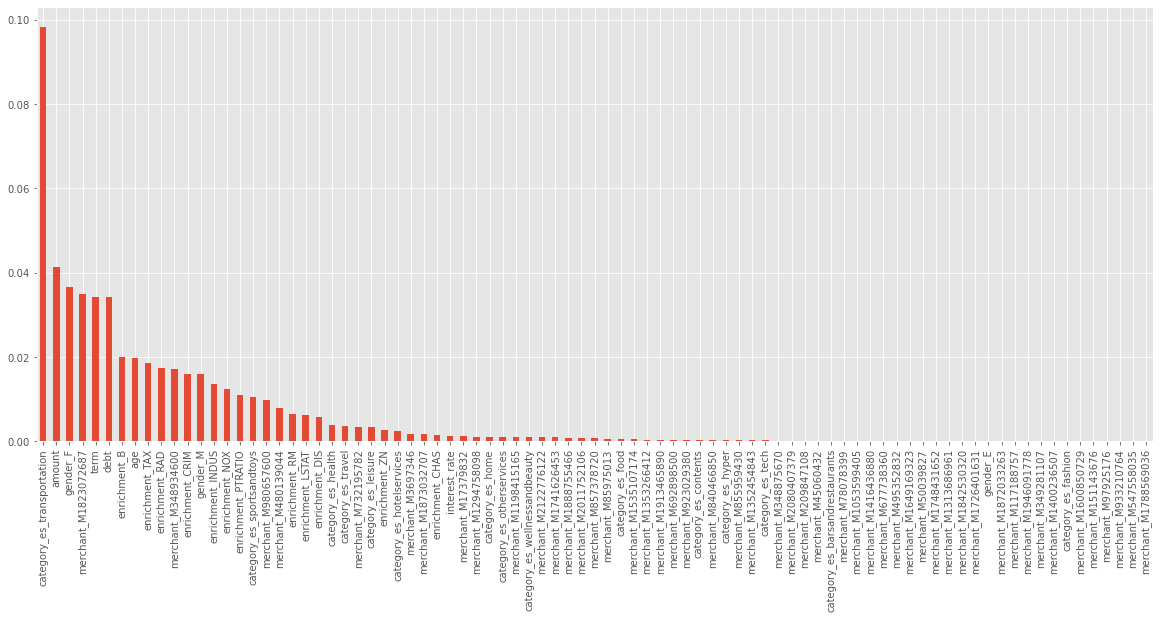

In [30]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [31]:
from sklearn.feature_selection import SelectKBest

In [32]:
#se usa chi2, que funciona mejor para tareas de clasificación, elimina variables menos importantes, correlaciones negativas,

sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

C:\Users\MX03932000\Documents\BD SQL\WinPython\WPy64-3890\python-3.8.9.amd64\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Index(['age', 'amount', 'debt', 'term', 'enrichment_RAD', 'enrichment_TAX',
       'enrichment_B', 'gender_F', 'merchant_M1823072687',
       'category_es_transportation'],
      dtype='object')

In [56]:
X_=data[['age', 'amount', 'debt', 'term', 'enrichment_RAD', 'enrichment_TAX',
       'enrichment_B', 'gender_F', 'merchant_M1823072687',
       'category_es_transportation']]
y=y.copy()